# Frequency Analysis

Frequency analysis is a way of decoding simple(mono alphabetic) substitution ciphers. Frequency analysis is based on the fact that certain letters, appear with characteristic frequency in a particular language.

So lets define some text in a unknown language.

In [1]:
string = "Three blind mice. Oh! See how they run."

"Three blind mice. Oh! See how they run."

We then remove all non alphabetic characters and break up the text up in to an array of the individual characters.

In [2]:
arr = string.downcase().gsub(/[^a-z]/, '').chars()

["t", "h", "r", "e", "e", "b", "l", "i", "n", "d", "m", "i", "c", "e", "o", "h", "s", "e", "e", "h", "o", "w", "t", "h", "e", "y", "r", "u", "n"]

Make an array with all the characters that occur in the text.

In [3]:
arr1 = arr.uniq().sort { |a, b| a <=> b }

["b", "c", "d", "e", "h", "i", "l", "m", "n", "o", "r", "s", "t", "u", "w", "y"]

Count all appearances of each character.

In [4]:
arr2 = arr1.map { |c| [c, arr.count(c)] }

[["b", 1], ["c", 1], ["d", 1], ["e", 6], ["h", 4], ["i", 2], ["l", 1], ["m", 1], ["n", 2], ["o", 2], ["r", 2], ["s", 1], ["t", 2], ["u", 1], ["w", 1], ["y", 1]]

Sort according to occurrence. 

In [5]:
arr3 = arr2.sort_by {|a| a[1]}.reverse()

[["e", 6], ["h", 4], ["o", 2], ["n", 2], ["t", 2], ["i", 2], ["r", 2], ["y", 1], ["m", 1], ["l", 1], ["s", 1], ["u", 1], ["w", 1], ["d", 1], ["c", 1], ["b", 1]]

In [6]:
IRuby.display IRuby.table(arr3.transpose())
nil

"<table><tr><td>e</td><td>h</td><td>o</td><td>n</td><td>t</td><td>i</td><td>r</td><td rowspan='2'>&#8230;</td><td>m</td><td>l</td><td>s</td><td>u</td><td>w</td><td>d</td><td>c</td></tr><tr><td>6</td><td>4</td><td>2</td><td>2</td><td>2</td><td>2</td><td>2</td><td>1</td><td>1</td><td>1</td><td>1</td><td>1</td><td>1</td><td>1</td></tr></table>"

In [7]:
label  = arr3.transpose()[0]
arr4  = arr3.transpose()[1]

[6, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [10]:
require 'rubyvis'

# Sizing and scales.
w = 400
h = 250
x = pv.Scale.linear(0, 11).range(0, w)
y = pv.Scale.ordinal(pv.range(10)).split_banded(0, h, 4/5.0)

#/* The root panel. */
vis = pv.Panel.new()
    .width(w)
    .height(h)
    .bottom(20)
    .left(20)
    .right(10)
    .top(5)

#/* The bars. */
bar = vis.add(pv.Bar)
    .data(arr4)
    .top(lambda { y.scale(self.index)})
    .height(y.range_band)
    .left(0)
    .width(x)

#/* The value label. */
bar.anchor("right").add(pv.Label)
    .text_style("white")
    .text(lambda {|d| "%0.1f" % d})

#/* The variable label. */
bar.anchor("left").add(pv.Label)
    .text_margin(5)
    .text_align("right")
    .text(lambda {|l| "%s" % l})
 
#/* X-axis ticks. */
vis.add(pv.Rule)
    .data(x.ticks(5))
    .left(x)
    .stroke_style(lambda {|d|  d!=0 ? "rgba(255,255,255,.3)" : "#000"})
  .add(pv.Rule)
    .bottom(0)
    .height(5)
    .stroke_style("#000")
  .anchor("bottom").add(pv.Label)
  .text(x.tick_format)

vis

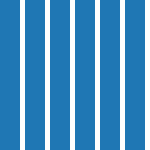

In [12]:
require 'rubyvis'
    
Rubyvis::Panel.new do 
  width 150
  height 150
  bar do
    data(arr4)
    width 20
    height {|d| d * 80}
    bottom(0)
    left {index * 25}
  end
end